___
# <font color=#00FF77> CMSE 830</font>
## <font color=#00FF88> HW #4</font>

____



### Name: Md Arifuzzaman Faisal

____
![kde](https://blogs.sas.com/content/iml/files/2016/07/kdecomponents1.png)

## Problem #1 (10pts):
### KDE and Rug Plots (from scratch!)

You are earning some extra money working in a restaurant while you complete your data science degree. In a conversation with other employees, the topic of tips comes up: do people tip 15% or 20%? An "argument" breaks out before you interrupt and point out that there is a distribution of tips, not a fixed value. In fact, you propose that the distribution of tips is normally distributed. To your surprise, you learn that one of the waitresses is also a data scientist student who points out that there is no reason to believe that the distribution of tips is normal and that the mean and standard deviation have any meaning. You propose to answer these questions by building a KDE of tip data!

✍🏻 For this problem, do **not** use a library to compute the KDE - do it yourself using basic Python. Your plot will be similar to the one above. Follow these steps:
* get the standard "tips" dataset (which is in Seaborn)
* compute the percentage tip from the data, and store those values in an array
* in `matplotlib`, plot a vertical line from 0 to 1 for each tip percentage (there are many ways to do this, but an easy way is to use [`vlines`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)); you should have a vertical line marking each percentage tip in the dataset
* adjust the figure so that you can view the data well, perhaps using something like `plt.figure(figsize=(20,5))`
* from this plot, do you think that tips are normally distributed? why or why not?
* write a function called `my_kde` that reads in three variables: the _x_ values you want to plot over (perhaps use `linspace` over the range of percentage tip), the array of percent tips _p_ you computed above and the width _w_ of the kernel; make your kernel have the form $$K(x,p) = \exp(-(x - p)^2/2w^2)/(w\sqrt{2\pi})$$ and return the [sum of the kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation) over all of the tip percentages (note that this will be an array over the _x_ values)
* plot your kde with the vertical lines you produced above - note that the vertical lines (if you made them from _0_ to _1_) will be a rug plot,
* make several plots with different values of the width _w_ (perhaps in the range _0.2_ to _6_); which value of _w_ is best?
* using NumPy, compute the mean and standard deviation of the percent tips, construct a normal distribution from those values and add that to your plot: this is the best normal distribution the data suggests and it many or may not look like the KDE (hint: `plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))`)
* if you make your width _w_ too large, does the KDE predict anything impossible?
* finally, answer the question: do you think this is a normal distribution? Would you arrive at a different conclusion depending on which width _w_ you pick? What is your conclusion to the original conversation in the restaurant? Do you see outliers? (Put discussion in a markdown cell.)



_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._


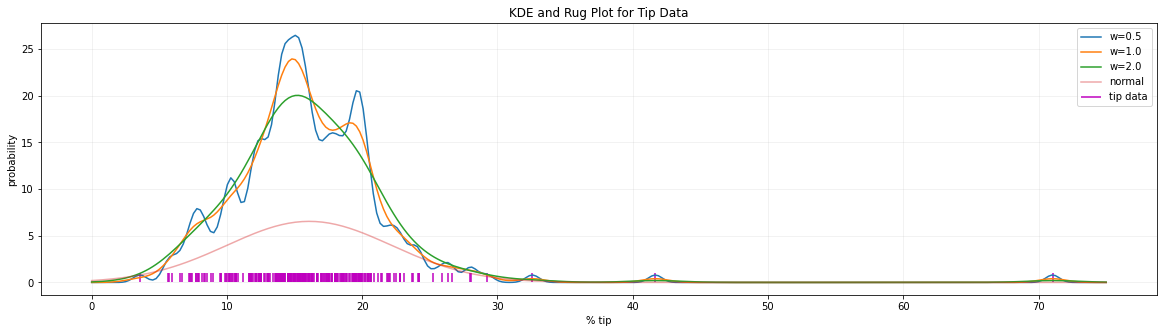

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

df = sns.load_dataset("tips")
tip_perc = np.array(df["tip"]/df["total_bill"])*100


def my_kde(x_vals, tips, width):

  kde = np.zeros(len(x_vals))

  for tip in tips:

    kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)

  return kde

x_vals = np.linspace(0,75, 300)

plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label="w=0.5")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label="w=1.0")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label="w=2.0")
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='normal')

# rug plot
plt.vlines(tip_perc, 0, 1, 'm', label='tip data')

plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% tip")
plt.ylabel("probability")
plt.legend()

In [2]:
df=sns.load_dataset("tips");
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
df2 = df
# Compute the percentage tip
df2['percentage_tip'] = (df2['tip'] / df2['total_bill']) * 100
df2

,total_bill,tip,sex,smoker,day,time,size,percentage_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [4]:
percentage_tips_array = df2['percentage_tip'].values
# Print the first few values for verification
print(percentage_tips_array[:5])

[ 5.94467334 16.05415861 16.65873394 13.97804054 14.68076454]


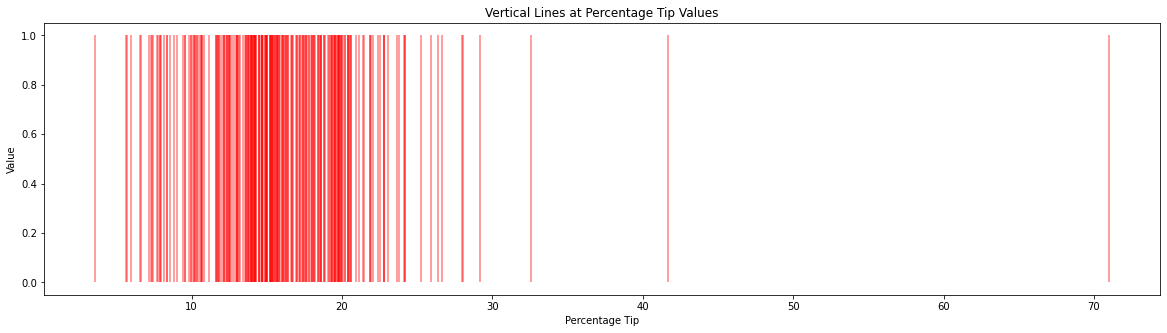

In [5]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(20,5))

# Plot vertical lines at each percentage tip value
plt.vlines(percentage_tips_array, ymin=0, ymax=1, colors='r', alpha=0.5)

# Set labels and title
plt.xlabel('Percentage Tip')
plt.ylabel('Value')
plt.title('Vertical Lines at Percentage Tip Values')

# Show the plot
plt.show()

### Discussion
Regarding the distribution of the data, the plot with vertical lines won't directly tell us if the data is normally distributed. It simply displays the distribution of percentage tips in the dataset. Histogram or a probability plot
can say more clearly.
The data is not symmetrically distributed around a central point, which is a characteristic of a normal distribution. Additionally, if the mean, mode, and median are not approximately equal, it further supports the notion that the data is not normally distributed.

In [23]:
def my_kde2(x, p, w):
    kde = np.zeros_like(x)
    for tip in p:
        kernel = np.exp(-0.5 * ((x - tip) / w) ** 2) / (w * np.sqrt(2 * np.pi))
        kde += kernel
    return kde


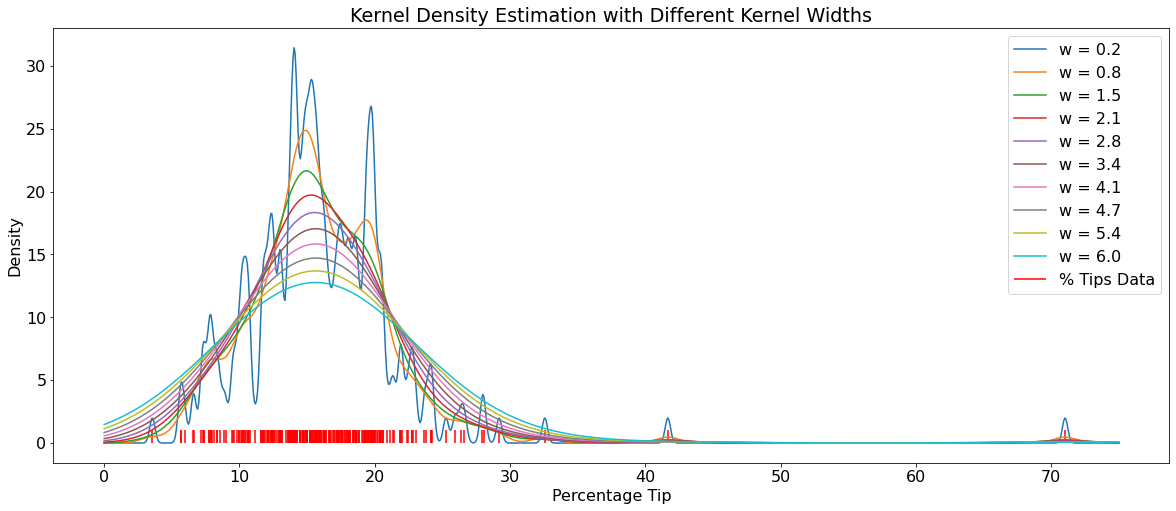

In [24]:
x_values = np.linspace(0,75, 1000)

# Range of kernel widths (w) to test
widths = np.linspace(0.2,6,10) 

# Set up the figure
plt.figure(figsize=(20,8))
# Set font size
font_size = 16
plt.rcParams.update({'font.size': font_size})

# Plot KDEs for different values of w
for i, w in enumerate(widths):
    plt.plot(x_values, my_kde2(x_values, percentage_tips_array, w), label=f'w = {w:.1f}')

# Plot vertical lines (rug plot) for the percentage tip data
plt.vlines(percentage_tips_array, 0, 1, 'r', label="% Tips Data")

# Add labels and legend
plt.xlabel('Percentage Tip')
plt.ylabel('Density')
plt.title('Kernel Density Estimation with Different Kernel Widths')
plt.legend()
plt.show()

In [25]:
mean=np.mean(percentage_tips_array)
print(f"Mean of percentage tips is {mean} %")
median=np.median(percentage_tips_array)
print(f"Median of percentage tips is {median} %")

Mean of percentage tips is 16.08025817225047 %
Median of percentage tips is 15.476977125802577 %


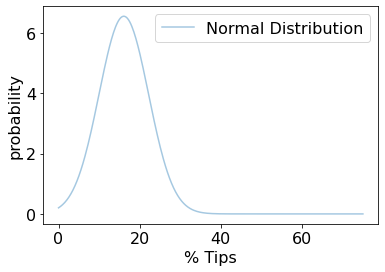

In [26]:

plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='Normal Distribution')
plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()


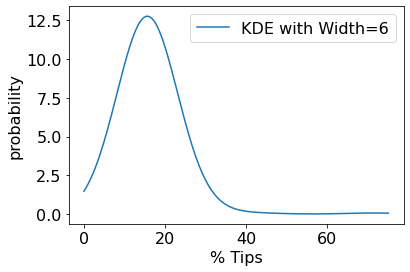

In [27]:
plt.plot(x_values, my_kde2(x_values,percentage_tips_array,6), label="KDE with Width=6")
plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()

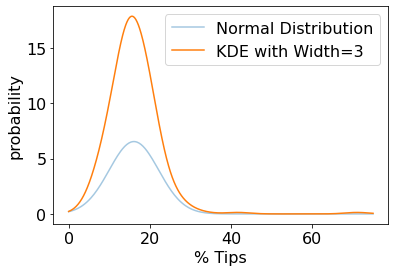

In [31]:
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='Normal Distribution')
plt.plot(x_values, my_kde2(x_values,percentage_tips_array,3), label="KDE with Width=3")

plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()

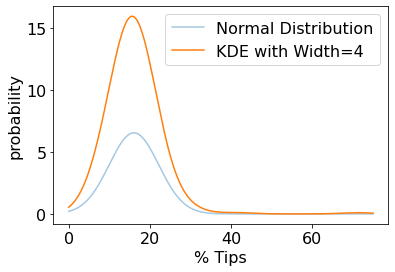

In [32]:
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='Normal Distribution')
plt.plot(x_values, my_kde2(x_values,percentage_tips_array,4), label="KDE with Width=4")

plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()

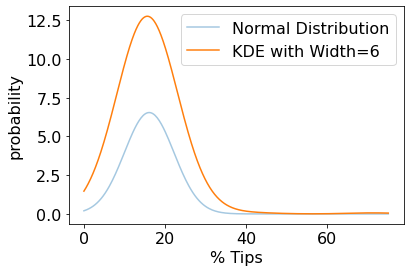

In [28]:
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='Normal Distribution')
plt.plot(x_values, my_kde2(x_values,percentage_tips_array,6), label="KDE with Width=6")

plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()

array([0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194684,
       0.00194684, 0.00194684, 0.00194684, 0.00194684, 0.00194

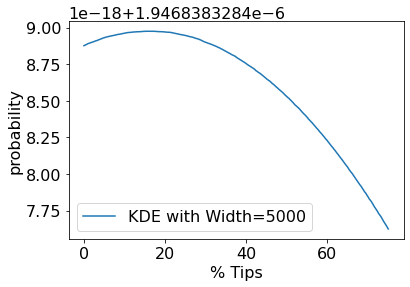

In [30]:

plt.plot(x_values, my_kde2(x_values,percentage_tips_array,50000000), label="KDE with Width=5000")

plt.xlabel("% Tips")
plt.ylabel("probability")
plt.legend()
my_kde2(x_values,percentage_tips_array,50000)

#### If you make your width w too large, does the KDE predict anything impossible?
If we make w too large, the KDE will oversmooth the data, potentially resulting in predictions that don't accurately represent the underlying distribution. 
#### Do you think this is a normal distribution? Would you arrive at a different conclusion depending on which width w you pick?
Based on the plot, it appears that the distribution of percentage tips may not closely follow a normal distribution. The KDE and the normal distribution curve do not match well, indicating that the data may not be normally distributed. 
The choice of `w` can affect the appearance of the KDE, but even with different `w` values, the data still doesn't closely resemble a normal distribution.
#### What is your conclusion to the original conversation in the restaurant? Do you see outliers?
From the visualizations, it seems that the distribution of percentage tips may not be normally distributed.

____
![project](https://miro.medium.com/max/1400/1*xf7i-aJrlKahzzfiM7Pxfw.png)
## Problem #2 (10pts)

### <font color=#839383>_choosing a topic for your project_</font>

We are $\frac{1}{4}$ done with the semester, which means we are $\frac{1}{2}$ way to your midterm project.

Your project should contain many technical, coding and visualization details. But, what is much more important is that there is a story. This week we will work on the story.

Last week you examined several datasets that might be useful for your project. For this HW problem, you can use what you did last week; or, this is the time to choose different datasets if you didn't find last week's interesting or useful. After this week, you should decide on a dataset and stick with it at least through the midterm project.


✍🏻 In a markdown cell below, answer these questions:
* from a set of at least three datasets, discuss what they reveal to you,
* what is interesting about these datasets from a science point of view?,
* what is interesting about these datasets from a _data_ science point of view?
* you will create a web app in Streamlit, placed at GitHub: what would a web app do for each of the datasets?,
* you are not the user of your web app - you are creating it for someone you will never meet: what do you want them to get from the web app for each of these dataset?

Based on these steps, which of the datasets is the more interesting to you for your project and why?

The goal is for you to decide on a topic and know that it will be usable. Very often we have a project in mind for which there is no dataset available that allows us to do what we want. This is the time to ensure, through EDA on several datasets, that our project is realistic.

If you choose one of the more common and simple datasets, such as MPG, Penguin or Iris, you need to have a very compelling reason for your choice. There is already a lot known on the web about these datasets and there is very little new you can do with them. 

### Question and Answer:

#### Answer from HW3: https://github.com/faisalece/CMSE830_HW3

##### from a set of at least three datasets, discuss what they reveal to you 
* The `Water Quality`dataset offers comprehensive information on various parameters of water sources, shedding light on potential contaminants and quality levels. By analyzing this dataset, one can gain valuable insights into the state of water resources, enabling informed decision-making for water management and public health protection.
* The `Stroke Prediction` Dataset provides critical insights into factors influencing stroke occurrence, including demographic, health, and lifestyle attributes. Through comprehensive analysis, it offers valuable information for developing effective preventive strategies and healthcare interventions to mitigate stroke risks.
* The `Life Expectancy (WHO) Dataset`, available on Kaggle, offers a comprehensive collection of factors influencing life expectancy worldwide. 

##### what is interesting about these datasets from a science point of view?

* Water Quality Dataset : It provides a comprehensive view of various water quality parameters, allowing for the study of environmental factors affecting water safety and public health.

* Stroke Prediction Dataset : Scientists can use this data to develop predictive models and gain a deeper understanding of stroke risk factors.

* Life Expectancy (WHO) Dataset : It offers a unique opportunity for scientific investigation into the determinants of longevity, allowing researchers to identify trends, correlations, and potential interventions for improving global health outcomes.

##### what is interesting about these datasets from a _data_ science point of view?

* Water Quality Dataset : This dataset provides an opportunity to employ various data preprocessing techniques, feature engineering, and machine learning algorithms to predict water quality parameters or detect anomalies.

* Stroke Prediction Dataset : Data scientists can leverage this dataset to build predictive models for stroke occurrence based on demographic and health-related features. 

* Life Expectancy (WHO) Dataset : This dataset allows for regression analysis and predictive modeling to understand the relationship between various socio-economic, health-related, and environmental factors and life expectancy. 

##### you will create a web app in Streamlit, placed at GitHub: what would a web app do for each of the datasets?
* My Github Repo : https://github.com/faisalece/CMSE830_HW4
* My Web App on StreamLit: https://cmse830hw4byfaisal.streamlit.app/

##### you are not the user of your web app - you are creating it for someone you will never meet: what do you want them to get from the web app for each of these dataset?

____
![project](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)
## Problem #3 (5pts)

### <font color=#839383>more on Streamlit</font>

From the previous problem, choose your favorite dataset - the one you are liking to use for the midterm project. Build that into a very simple Streamlit app.

Do that by watching this video. Follow the video and build a web app as you are watching, but using the dataset you chose from the previous problem.

The goal is that you start to connect the narrative associated with the data to what the purpose of the web app might be.

If you are having any trouble with deploying Streamlit, please contact us on Slack.


In [36]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_Um12_OlGgw?si=pYR7WmeChe7Xxpq5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


### My Web App on StreamLit: https://cmse830hw4byfaisal.streamlit.app/

____
![impute](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60128/versions/2/screenshot.jpg)
## Problem #4 (10pts)
### missingness and imputation

✍🏻 Open a markdown cell and answer these questions:
1. define "imputation" in your own words,
2. what is "listwise deletion" and what are two potential problems with using it?
3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have?
4. define "missingness",
5. what are the three main types of missingness?
6. how is multiple imputation implemented?
7. what is mean substitution, and what can go wrong?
8. what is regression substitution, and what does it miss?
9. what problem does stochastic regression solve?
10. rank from best to worst: MAR, MCAR, MNAR

### Question and Answer: 
#### 1. define "imputation" in your own words,
Imputation is a statistical technique used to handle missing data in a dataset. It involves estimating or filling in missing values with plausible values based on the observed data.
#### 2. what is "listwise deletion" and what are two potential problems with using it?
"Listwise deletion" is a technique in data handling where any row with missing values (NaN) in any of its columns is entirely removed from the dataset. This approach ensures that only complete cases are used for analysis.
However, two potential problems with listwise deletion are:
1. Loss of Information
2. Introducing Bias

#### 3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have?
"Pairwise deletion" removes only the missing values, unlike "listwise deletion," which removes entire rows with missing values. 

However, it can introduce inconsistencies and reduce sample sizes in subsequent analyses, potentially affecting the reliability and validity of results.
#### 4. define "missingness"
"Missingness" refers to the pattern or manner by which data values are absent or unavailable in a dataset.
#### 5. what are the three main types of missingness?
* Missing Completely at Random (MCAR)
* Missing at Random (MAR)
* Missing Not at Random (MNAR)

#### 6. how is multiple imputation implemented?
Multiple imputation involves creating several plausible imputed datasets, each with a different set of imputed values for missing data. These datasets are then analyzed separately, and the results are combined using specific rules to provide a more accurate and reliable estimate of the missing values and their uncertainty.
#### 7. what is mean substitution, and what can go wrong?
Mean substitution involves replacing missing values in a dataset with the mean of the available values for that variable. However, it can introduce bias and underestimate the variability of the data, as it does not account for the potential relationship between missingness and other variables.
#### 8. what is regression substitution, and what does it miss?
Regression substitution involves predicting missing values based on a regression model using other available variables. However, it may miss nonlinear relationships or interactions not captured by the chosen regression model.
#### 9. what problem does stochastic regression solve?
Stochastic regression helps address the problem of underestimating the variability associated with imputed values, as it incorporates variance estimation and adds noise to the imputations, resulting in more realistic and flexible imputed values.
#### 10. rank from best to worst: MAR, MCAR, MNAR
Ranking Missingness Types from best to worst:
* MCAR (Missing Completely at Random)
* MAR (Missing at Random)
* MNAR (Missing Not at Random)

___
![bvg](https://scipython.com/static/media/uploads/blog/multivariate_gaussian/bivariate_gaussian.png)

## Problem #5 (10pts)

### surface, image and contour plots


One of the most useful functions in data science is the Gaussian, which may be referred to as a "normal distribution". The Gaussian is central to the way we think about the mean and the standard deviation; and, because of its nice mathematical properties. Multivariate Gaussians appear in many data science models (e.g., machine learning models, such as Gaussian Process Regression).

Importantly for data science, we want to always use functions in an arbitrary number of dimensions.  For a Gaussian, we would refer to such a function as a multivariate Gaussian. We will cover the mathemtical details later in the semester. Today, we only wish to visualize a multivariate Gaussian to help us understand certain types of plots.

✍🏻 In `matplotlib` plot the Gaussian:
$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$
Plot this function for several values of $μ$ and $w$; in a markdown cell, comment on the meaning of these two parameters. Be sure your plot has a title along the lines of "Gaussian/Normal Distributions".

✍🏻 Next, make similar plots in 2D using a multivariate Gaussian:
$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$
This is a type of "bivariate Gaussian", because it is in 2D. In a markdown cell, write what $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are. That is, what aspects of the bivariate Gaussian do they control? Make three types of plots:
* surface plot,
* contour plot,
* image plot.

Use the same values in each so that you can compare these plots. The idea is that you learn how to interpret different types of visualizations that contain the same information.

Change the values of the parameters ($w_x$, $w_y$, $\mu_x$ and $\mu_y$) in several plots so that you can build your intuition for both bivariate Gaussians and what these three visualization types do.

_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._

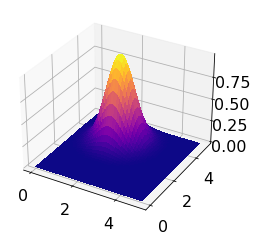

In [40]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)

mx = 2
my = 3.5
wx= 0.6
wy= 0.6

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

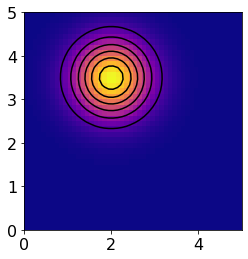

In [41]:
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');

In [42]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)

mx = 2
my = 3.5
wx= 0.6
wy= 0.6

Z = np.exp(-())

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

TypeError: bad operand type for unary -: 'tuple'

____
![box](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)
## Problem #6 (5pts)

### Violins and Boxes

✍🏻 Run the code below. In a markdown cell explain what the visualizations reveal to you. What story do you get? For example, why do you see the shapes that you see? How do you interpret these shapes? Do these two plots reveal the same information? Which one gives you more information?

For your projects, you will want to choose the best visualization that tells the story you wish to tell.

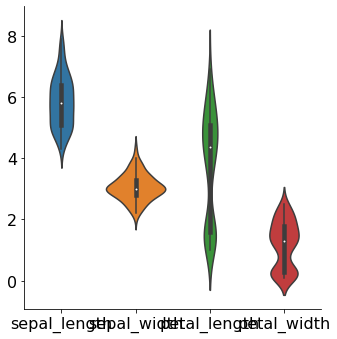

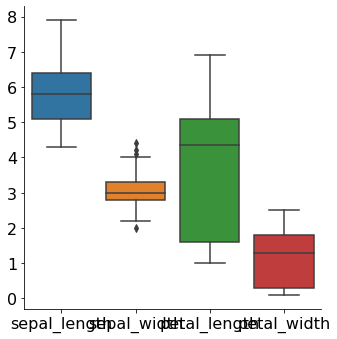

In [43]:
df_iris = sns.load_dataset("iris")

sns.catplot(data=df_iris, kind="violin")
sns.catplot(data=df_iris, kind="box")

### Answer:
The violin plot in the "iris" dataset visually depicts probability density at various values, showing wider sections for higher density and narrower sections for lower density. It offers a detailed view of distribution symmetry and potential multimodality. Meanwhile, the box plot presents summary statistics like median and interquartile range, emphasizing outlier identification and providing a concise overview of central tendency and spread. 

Overall, the violin plot offers a more nuanced understanding of the data's distribution compared to the box plot.